In [3]:
import requests
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/var/folders/bn/03dq06t97d3gghsyjq7y5h380000gn/T/ipykernel_57484/3619273039.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.sort_index(inplace=True)


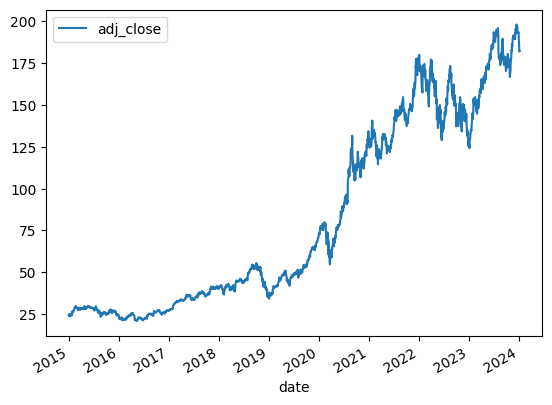

In [46]:
url = "https://www.alphavantage.co/query"
params = {
    "function": "TIME_SERIES_DAILY_ADJUSTED",
    "symbol": "AAPL",
    "outputsize": "full",
    "apikey": "FUPT81G3YM7VYKAX",
    "entitlement": "delayed"
}
response = requests.get(url, params)
if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data["Time Series (Daily)"]).T
    df['date'] = pd.to_datetime(df.index)
    df['adj_close'] = df['5. adjusted close'].astype(float)
    new_df = df[['date', 'adj_close']]

    # Set 'date' as the index of the new DataFrame
    new_df.set_index('date', inplace=True)
    new_df.sort_index(inplace=True)
    # Selecting rows from 2015-01-01 to the current date
    selected_df = new_df['2015-01-02':]
    selected_df.plot()
else:
    print("NO")

In [47]:
selected_df

,adj_close
date,
2015-01-02,24.465118
2015-01-05,23.775897
2015-01-06,23.778135
2015-01-07,24.111557
2015-01-08,25.037978
...,...
2023-12-29,192.530000
2024-01-02,185.640000
2024-01-03,184.250000


In [48]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(selected_df['adj_close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

# Interpretation
if result[0] < result[4]["5%"]:
    print("The series is stationary")
else:
    print("The series is non-stationary")

ADF Statistic: -0.023905
p-value: 0.956510
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
The series is non-stationary


In [64]:
from pmdarima import auto_arima
# Assuming 'time_series_data' is your time series data
model = auto_arima(selected_df['adj_close'], start_p=1, start_q=1,
    max_p=6, max_q=3, m=5, max_P=4, max_Q=4, max_D=2,
    seasonal=True, d=None, out_of_sample_size=int(len(selected_df)*.2), trace=True,
    error_action='ignore', suppress_warnings=True,
    stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(1,1,1)(1,0,1)[5] intercept   : AIC=9109.642, Time=1.47 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=9110.018, Time=0.07 sec


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_predicti

 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=9107.800, Time=0.24 sec


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_predicti

 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=9107.538, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=9111.388, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=9109.153, Time=0.15 sec


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_predicti

 ARIMA(0,1,1)(1,0,1)[5] intercept   : AIC=9109.331, Time=0.87 sec


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(0,1,1)(0,0,2)[5] intercept   : AIC=9108.940, Time=1.03 sec


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(0,1,1)(1,0,0)[5] intercept   : AIC=9107.669, Time=0.28 sec


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(0,1,1)(1,0,2)[5] intercept   : AIC=inf, Time=3.06 sec


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(0,1,0)(0,0,1)[5] intercept   : AIC=9108.254, Time=0.43 sec


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(1,1,1)(0,0,1)[5] intercept   : AIC=9107.884, Time=0.98 sec


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(0,1,2)(0,0,1)[5] intercept   : AIC=9108.238, Time=0.64 sec


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(1,1,0)(0,0,1)[5] intercept   : AIC=9107.669, Time=0.47 sec


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(1,1,2)(0,0,1)[5] intercept   : AIC=9109.871, Time=1.62 sec
 ARIMA(0,1,1)(0,0,1)[5]             : AIC=9108.863, Time=0.38 sec

Best model:  ARIMA(0,1,1)(0,0,1)[5] intercept
Total fit time: 12.253 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 2268
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 5)   Log Likelihood               -4549.769
Date:                           Sat, 06 Jan 2024   AIC                           9107.538
Time:                                   01:14:51   BIC                           9130.443
Sample:                                        0   HQIC                          9115.895
                                          - 2268                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025    

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='date'>

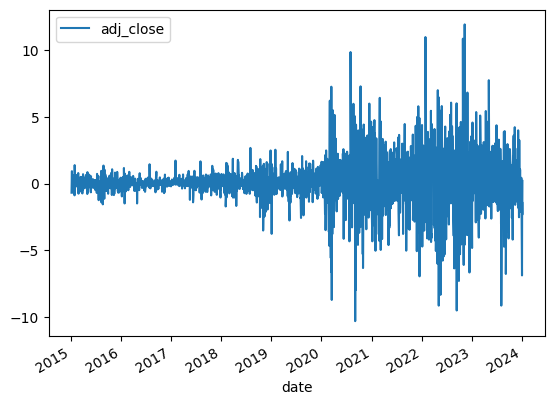

In [54]:
selected_df.diff().plot()

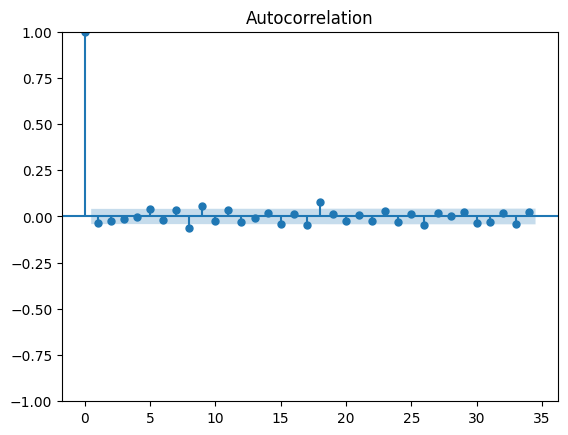

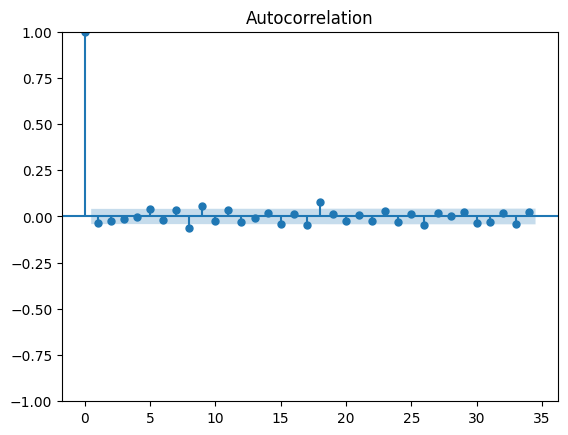

In [57]:
plot_acf(selected_df.diff().dropna())


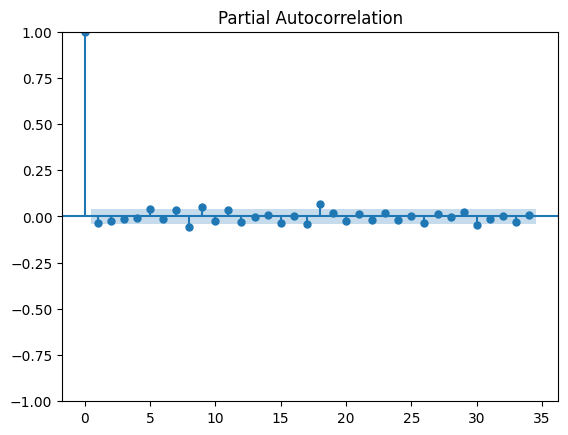

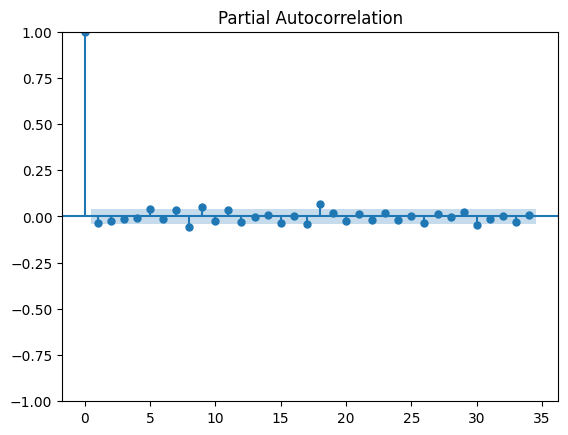

In [58]:
plot_pacf(selected_df.diff().dropna())

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2268    182.060641
2269    181.770989
2270    181.713038
2271    181.613921
2272    181.621359
           ...    
2353    181.621223
2354    181.621223
2355    181.621223
2356    181.621223
2357    181.621223
Name: predicted_mean, Length: 90, dtype: float64


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:                       adj_close   No. Observations:                 2268
Model:             ARIMA(0, 1, 1)x(0, 0, 1, 5)   Log Likelihood               -4551.431
Date:                         Sat, 06 Jan 2024   AIC                           9108.863
Time:                                 01:13:00   BIC                           9126.041
Sample:                                      0   HQIC                          9115.130
                                        - 2268                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0339      0.013     -2.660      0.008      -0.059      -0.009
ma.S.L5        0.0423      0.012      3.424      0.001       0.018       0.067
sigma2         3.2462      0.048     67.387      0.000       3.152       3.341
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3798.21
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              44.28   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

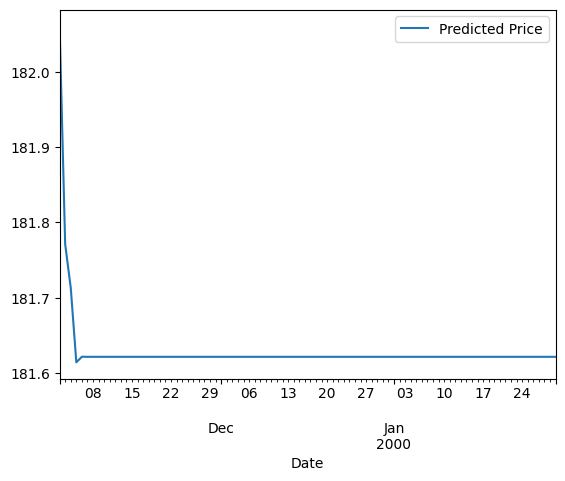

In [63]:
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
model = ARIMA(selected_df['adj_close'], order=(0, 1, 1), seasonal_order=(0,0,1,5)) 
fitted_model = model.fit()

# Forecast for the Next Three Months
# ARIMA's 'forecast' function automatically handles the date index
predicted_prices = fitted_model.forecast(steps=90)
print(predicted_prices)
# Creating a DataFrame for the predictions
last_date = new_df.index[0]
future_dates = [last_date + timedelta(days=i) for i in range(1, 91)]
predictions = pd.DataFrame({'Date': future_dates, 'Predicted Price': predicted_prices.values})
predictions.set_index('Date', inplace=True)
predictions.sort_index(inplace=True)
predictions.plot()
fitted_model.summary()
